In [1]:
#!/usr/bin/env python

*********************************************************************<br>
PROGRAM TO PLOT TIME SERIES (OUTPUT FROM run_cn.py in TIME SERIES MODE)<br>
<br>
Copyright (c) 2014-2019: HILARY R. MARTENS, LUIS RIVERA, MARK SIMONS         <br>
<br>
This file is part of LoadDef.<br>
<br>
   LoadDef is free software: you can redistribute it and/or modify<br>
   it under the terms of the GNU General Public License as published by<br>
   the Free Software Foundation, either version 3 of the License, or<br>
   any later version.<br>
<br>
   LoadDef is distributed in the hope that it will be useful,<br>
   but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
   GNU General Public License for more details.<br>
<br>
   You should have received a copy of the GNU General Public License<br>
   along with LoadDef.  If not, see <https://www.gnu.org/licenses/>.<br>
<br>
*********************************************************************

MODIFY PYTHON PATH TO INCLUDE 'LoadDef' DIRECTORY

In [2]:
from __future__ import print_function
import sys
import os
sys.path.append(os.getcwd() + "/../../")

Import Python Modules

In [3]:
import numpy as np
from scipy import signal
import datetime
from math import pi
import matplotlib.pyplot as plt

Input Parameters

In [4]:
station = ("P144")
filename = ("cn_LandAndOceans_" + station + "_cf_convgf_grace_rmTM1False_rmSM2False_20191001-20211001_GRACE_Tellus_RL06_JPL_ScalingFalse_stationMesh_PREM")
ts_file = ("../../output/Convolution/" + filename + ".txt")
figname = (filename + ".pdf")

Detrend the Time Series? (Caution! Assumes equally spaced points)

In [5]:
detrend = True
 
#### Begin Code

Create Folder

In [6]:
if not (os.path.isdir("./output/")):
    os.makedirs("./output/")
outdir = "./output/"

Read File

In [7]:
date = np.loadtxt(ts_file,usecols=(0,),dtype='U',unpack=True,skiprows=1)
lat,lon,eamp,epha,namp,npha,vamp,vpha = np.loadtxt(ts_file,delimiter=None,unpack=True,skiprows=1,usecols=(1,2,3,4,5,6,7,8))

Convert Dates to Datetime Format

In [8]:
mydates = []
hour = 0
for jj in range(0,len(date)):
    mydate = date[jj]
    year = int(mydate[0:4])
    month = int(mydate[4:6])
    day = int(mydate[6:8])
    hour = int(mydate[8:10]) 
    ddate = datetime.datetime(year,month,day,hour,0,0)
    mydates.append(ddate)
# Convert Date List to Numpy Array
mydates = np.array(mydates)

Convert Amp/Pha to Displacement

In [9]:
ets = np.multiply(eamp,np.cos(np.multiply(epha,(pi/180.))))
nts = np.multiply(namp,np.cos(np.multiply(npha,(pi/180.))))
vts = np.multiply(vamp,np.cos(np.multiply(vpha,(pi/180.))))

Optionally Detrend

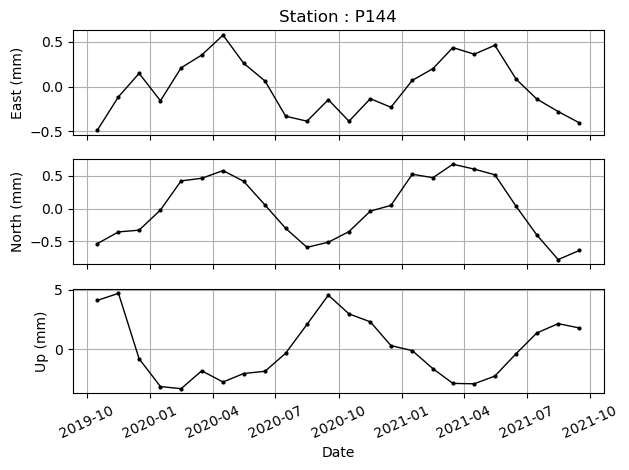

In [10]:
if (detrend == True):
    ets = signal.detrend(ets,type='linear')
    nts = signal.detrend(nts,type='linear')
    vts = signal.detrend(vts,type='linear')
 
# Plot
plt.subplot(3,1,1)
plt.plot_date(mydates,ets,'.',color='black',ms=4,linestyle='-',linewidth=1)
plt.title("Station : " + station)
plt.ylabel('East (mm)')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(True)
plt.subplot(3,1,2)
plt.plot_date(mydates,nts,'.',color='black',ms=4,linestyle='-',linewidth=1)
plt.ylabel('North (mm)')
plt.grid(True)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.subplot(3,1,3)
plt.plot_date(mydates,vts,'.',color='black',ms=4,linestyle='-',linewidth=1)
plt.ylabel('Up (mm)')
plt.xlabel('Date')
plt.xticks(rotation=25)
plt.grid(True)
plt.tight_layout()
plt.savefig((outdir+figname),orientation='portrait',format='pdf')
plt.show()